HR ANALYTICS
===
A company which is active in Big Data and Data Science wants to hire data scientists conduct a training program for aspirants. Many people signed up for their training and the company wants to know which of these candidates really wants to work for them after training or are looking for a new employment because it helps to reduce the cost and time including the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience from candidates are from the signup and enrollment data.

# Libraries

In [310]:
# import pandas to be able to use dataframes
import pandas as pd

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline

import numpy as np

from sklearn.impute import SimpleImputer

from scipy.stats import chisquare

# Exploration

In [60]:
# load training data
training_df = pd.read_csv("data/aug_train.csv")

In [61]:
# let's look at some sample files
training_df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

Features
===
* enrollee_id : Unique ID for enrollee
* city: City code
* citydevelopmentindex: Developement index of the city (scaled)
* gender: Gender of enrolee
* relevent_experience: Relevent experience of enrolee
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of enrolee
* major_discipline :Education major discipline of enrolee
* experience: Enrolee total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

In [62]:
# Let's look at some sample data and see how it aligns to the data dictionary
training_df[training_df['company_type'] =='Funded Startup'].head(1).T

4
enrollee_id                                 666
city                                   city_162
city_development_index                    0.767
gender                                     Male
relevent_experience     Has relevent experience
enrolled_university               no_enrollment
education_level                         Masters
major_discipline                           STEM
experience                                  >20
company_size                              50-99
company_type                     Funded Startup
last_new_job                                  4
training_hours                                8
target                                        0

In [63]:
# Let's look at some statistics
training_df.describe(include = 'all')

enrollee_id      city  city_development_index gender  \
count   19158.000000     19158            19158.000000  14650   
unique           NaN       123                     NaN      3   
top              NaN  city_103                     NaN   Male   
freq             NaN      4355                     NaN  13221   
mean    16875.358179       NaN                0.828848    NaN   
std      9616.292592       NaN                0.123362    NaN   
min         1.000000       NaN                0.448000    NaN   
25%      8554.250000       NaN                0.740000    NaN   
50%     16982.500000       NaN                0.903000    NaN   
75%     25169.750000       NaN                0.920000    NaN   
max     33380.000000       NaN                0.949000    NaN   

            relevent_experience enrolled_university education_level  \
count                     19158               18772           18698   
unique                        2                   3               5   
top     Has relevent experience       no_enrollment        Graduate   
freq                      13792               13817           11598   
mean                        NaN                 NaN             NaN   
std                         NaN                 NaN             NaN   
min                         NaN                 NaN             NaN   
25%                         NaN                 NaN             NaN   
50%                         NaN                 NaN             NaN   
75%                         NaN                 NaN             NaN   
max                         NaN                 NaN             NaN   

       major_discipline experience company_size company_type last_new_job  \
count             16345      19093        13220        13018        18735   
unique                6         22            8            6            6   
top                STEM        >20        50-99      Pvt Ltd            1   
freq              14492       3286         3083         9817         8040   
mean                NaN        NaN          NaN          NaN          NaN   
std                 NaN        NaN          NaN          NaN          NaN   
min                 NaN        NaN          NaN          NaN          NaN   
25%                 NaN        NaN          NaN          NaN          NaN   
50%                 NaN        NaN          NaN          NaN          NaN   
75%                 NaN        NaN          NaN          NaN          NaN   
max                 NaN        NaN          NaN          NaN          NaN   

        training_hours        target  
count     19158.000000  19158.000000  
unique             NaN           NaN  
top                NaN           NaN  
freq               NaN           NaN  
mean         65.366896      0.249348  
std          60.058462      0.432647  
min           1.000000      0.000000  
25%          23.000000      0.000000  
50%          47.000000      0.000000  
75%          88.000000      0.000000  
max         336.000000      1.000000

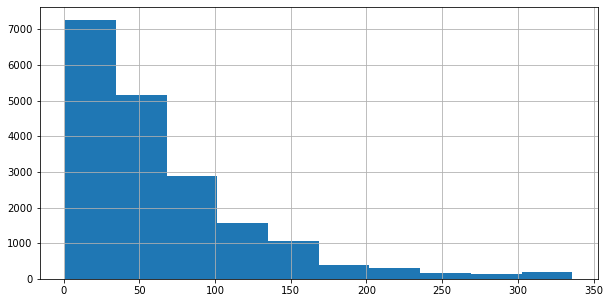

In [288]:
training_df['training_hours'].hist(figsize=(10,5))

In [64]:
# there are 10 objects (strings/categorical) and 4 numerical features
training_df.dtypes.value_counts()

object     10
float64     2
int64       2
dtype: int64

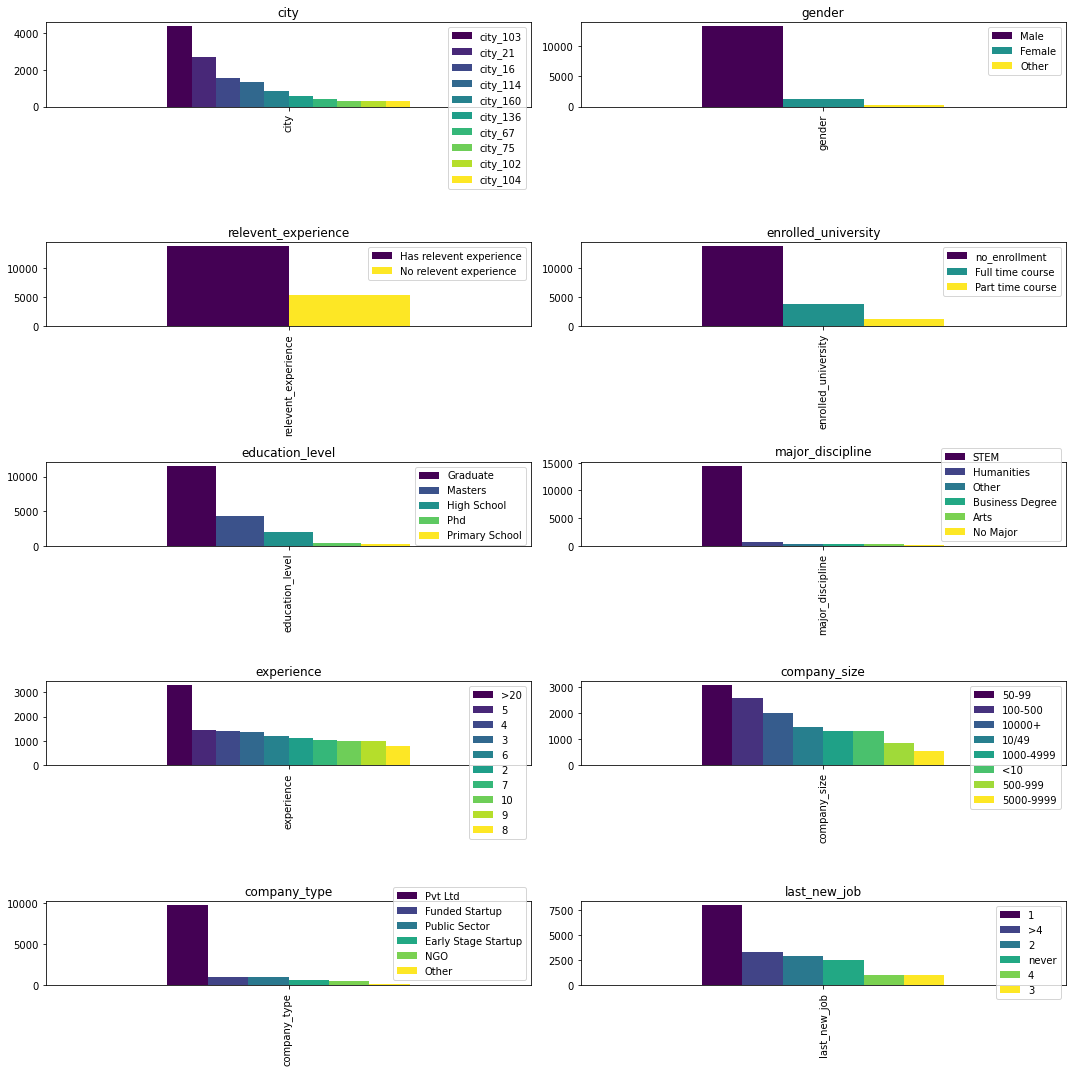

In [121]:
# let's create simple code that will loop thru all categorical values and plot their distribution (up to the top 10 values)

f, axs = plt.subplots(5,2, figsize=(15,15))
axs = axs.ravel()
j = 0

for i in training_df.columns:
    series = training_df[i]
    tmp_df = pd.DataFrame(series.value_counts())
    tmp_df = tmp_df.head(10).T

    if(series.dtype == 'object'):
        tmp_df.plot.bar(ax=axs[j],title=i,cmap="viridis")
        j+=1
plt.tight_layout()
plt.show()

# Target

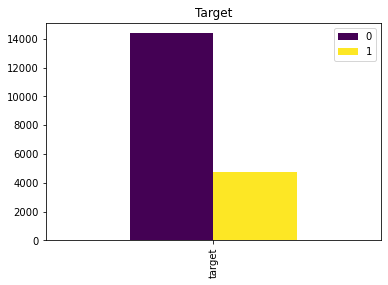

In [253]:
# Let's look at the target variable and how the attributes are distributed with respect to it

tmp_df = pd.DataFrame(training_df['target'].value_counts().reset_index(drop=True)).T
tmp_df.plot.bar(title="Target",cmap="viridis")

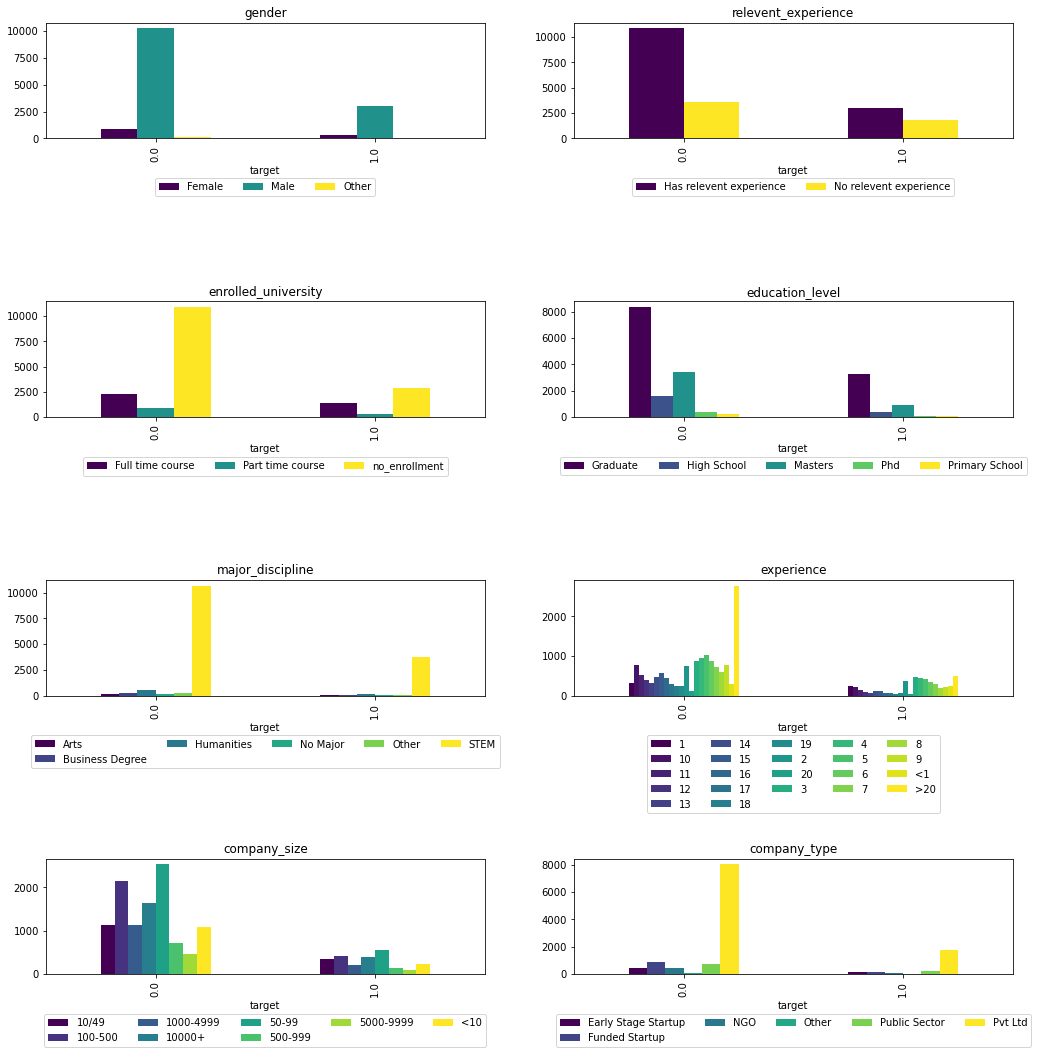

In [184]:
# Let's take a look at how the distribution looks like with respect to the target

fig = plt.figure(figsize=(15,15))

j = 0
ignore_list = ['target','enrollee_id','city','city_development_index']

for i in training_df.columns:

    if(series.dtype == 'object' or (i not in ignore_list and j<8) ):
        
        fig.add_subplot(421+j)
        ax_list = fig.axes
        
        tmp_df = pd.pivot_table(training_df,index="target",values="enrollee_id",columns=i,aggfunc="count")
        tmp_df.plot.bar(ax=ax_list[j],title=i,cmap="viridis")
        ax_list[j].legend(loc='upper center', bbox_to_anchor=(0.5, -0.30), ncol=5)
        j+=1
        
fig.tight_layout() 
plt.show()

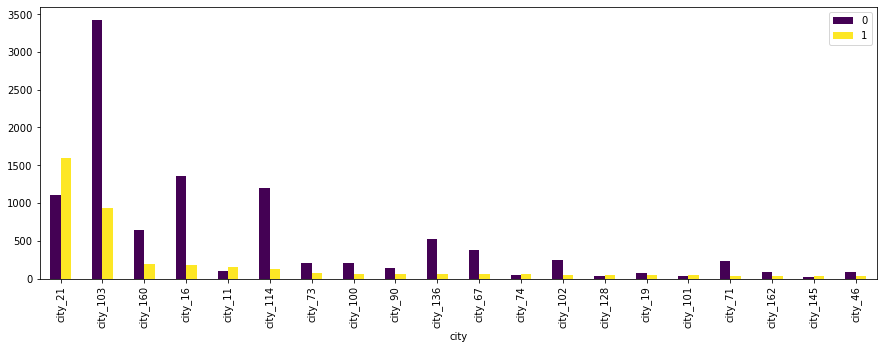

In [251]:
tmp_df = pd.pivot_table(training_df[['target','enrollee_id','city']],index="city",columns="target",aggfunc="count")
tmp_df.columns = [0,1]
tmp_df.columns.index = 'city'
tmp_df = tmp_df.sort_values(1,ascending=False)
tmp_df[0:20].plot.bar(cmap="viridis",figsize=(15,5))

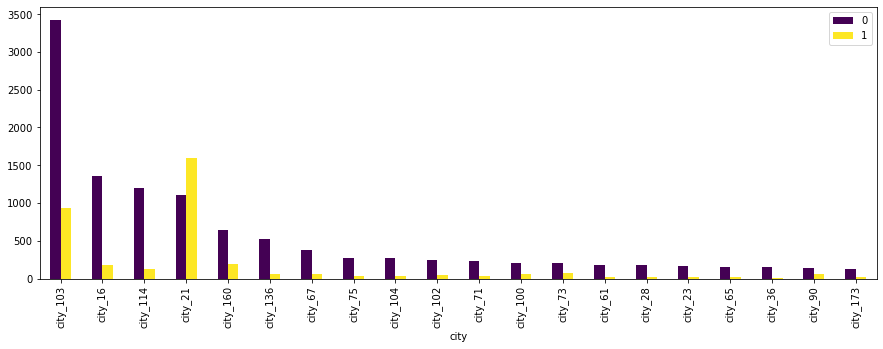

In [252]:
tmp_df = pd.pivot_table(training_df[['target','enrollee_id','city']],index="city",columns="target",aggfunc="count")
tmp_df.columns = [0,1]
tmp_df.columns.index = 'city'
tmp_df = tmp_df.sort_values(0,ascending=False)
tmp_df[0:20].plot.bar(cmap="viridis",figsize=(15,5))

City development index
===
The City Development Index was developed for the Second United Nations Conference on Human Settlements (Habitat II) in 1996 and measures the level of development in cities. The Urban Indicators Programme of the United Nations Human Settlements Programme (UN-Habitat) developed the indicator so that they could rank cities of the world according to their level of development and as a display of indicators depicting development. The CDI cuts across the different clusters identified in the Urban Indicator Framework as it is based on five sub indices namely, infrastructure, waste, health, education and city product. It is useful as it provides a snap-shot view of how cities are doing with respect to the different indices. It was invented by Dr Joe Flood, first Coordinator of the Urban Indicators Program, following a statistical analysis of city indicators data.
Reference :https://en.wikipedia.org/wiki/City_development_index

![Computation](img/Calculation-of-CDI-by-UN-HABITAT-GUIP-Index-Formula.png)

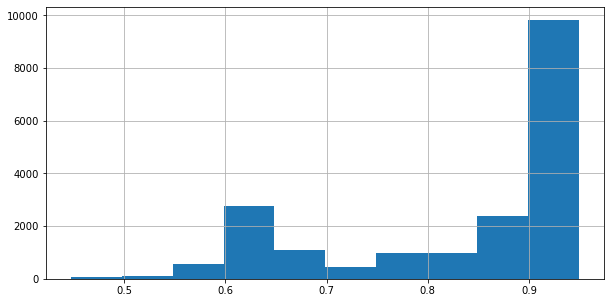

In [257]:
training_df['city_development_index'].hist(figsize=(10,5))

In [268]:
training_df[['city_development_index','city']].drop_duplicates().sort_values('city_development_index',ascending=False)[0:20]

city_development_index      city
112                    0.949   city_98
61                     0.939   city_75
183                    0.939   city_28
15                     0.926  city_114
157                    0.925   city_89
115                    0.925   city_97
41                     0.924  city_104
49                     0.923   city_83
903                    0.921  city_167
6                      0.920  city_160
0                      0.920  city_103
341                    0.915   city_99
12                     0.913   city_61
34                     0.910   city_16
204                    0.903  city_165
330                    0.899   city_23
1060                   0.898   city_39
106                    0.897  city_136
118                    0.896   city_50
395                    0.895   city_10

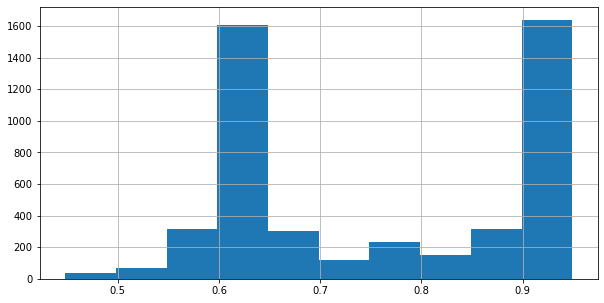

In [269]:
tmp_df = training_df[training_df['target']==1]
tmp_df['city_development_index'].hist(figsize=(10,5))

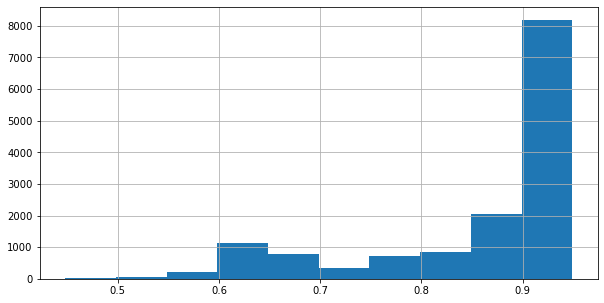

In [270]:
tmp_df = training_df[training_df['target']==0]
tmp_df['city_development_index'].hist(figsize=(10,5))

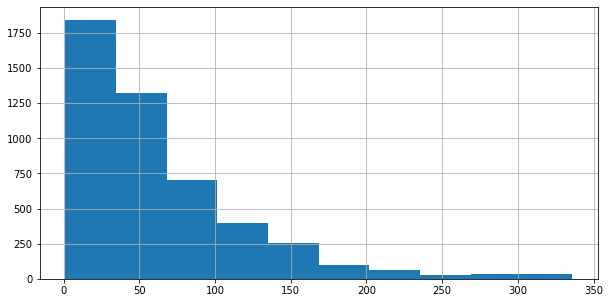

In [286]:
tmp_df = training_df[training_df['target']==1]
tmp_df['training_hours'].hist(figsize=(10,5))

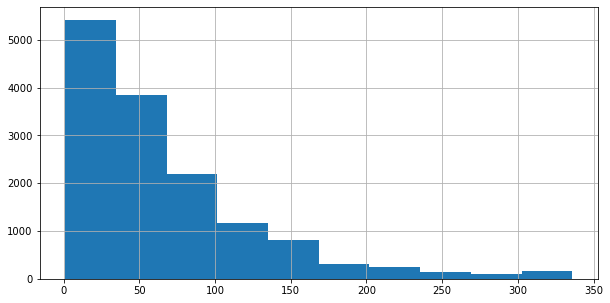

In [287]:
tmp_df = training_df[training_df['target']==0]
tmp_df['training_hours'].hist(figsize=(10,5))

# Correlation

We need to find a good idea of what feature to prioritize on our initial base model before we do any sort of optimization. Let's do some basic correlation tests to find out which have influences tha target variable

In [309]:
# Numerical Correlation using Pearson

corrMatrix=training_df[["city","city_development_index","gender","relevent_experience","enrolled_university","education_level",
                   "major_discipline","experience","company_size","company_type","last_new_job","training_hours","target"]].corr()

corrMatrix

city_development_index  training_hours    target
city_development_index                1.000000        0.001920 -0.341665
training_hours                        0.001920        1.000000 -0.021577
target                               -0.341665       -0.021577  1.000000

In [315]:
training_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

0         1         2         3
0  0.0  0.333333  0.333333  0.333333
1  0.5  0.000000  0.000000  0.000000
2  0.5  0.000000  0.000000  0.000000
3  0.5  0.000000  0.000000  0.000000

# Preprocessing

In [283]:
# How many null values do we have per column?

training_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [299]:
# Let's deal with these null values by replacing them with the most frequent value per column

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
tmp = imp_mean.fit_transform(training_df)
tmp_df = pd.DataFrame(tmp)
tmp_df.columns = training_df.columns
tmp_df.head()

enrollee_id      city city_development_index gender  \
0        8949  city_103                   0.92   Male   
1       29725   city_40                  0.776   Male   
2       11561   city_21                  0.624   Male   
3       33241  city_115                  0.789   Male   
4         666  city_162                  0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20        50-99         Pvt Ltd            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5        50-99         Pvt Ltd        never   
3  Business Degree         <1        50-99         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

  training_hours target  
0             36      1  
1             47      0  
2             83      0  
3             52      1  
4              8      0

In [300]:
# do we still have any null values
processed_training_df = tmp_df.copy()
processed_training_df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [305]:
# convert features that should be numerical

processed_training_df["target"] = pd.to_numeric(processed_training_df["target"])
processed_training_df["city_development_index"] = pd.to_numeric(processed_training_df["city_development_index"])
processed_training_df["training_hours"] = pd.to_numeric(processed_training_df["training_hours"])
processed_training_df["enrollee_id"] = pd.to_numeric(processed_training_df["enrollee_id"])

In [306]:
# convert categorical to dummy values

processed_training_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

# Train and Test Split

In [290]:
# setup train and test split strategy

# Logistic Regression

In [ ]:
# Base model

In [291]:
# Using Grid Search function

In [ ]:
# Sample output

# Model Metrics

# Model output and Persistence

# What's Next?